In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
L=[1e3, 1e4, 1e5, 1e6]

In [3]:
sigma_prior = 1
N = 100000.0
def hess(sigma):
    NH= (1/sigma**2)-(1/sigma_prior**2)
    return NH/(N)

0.9444927436370651


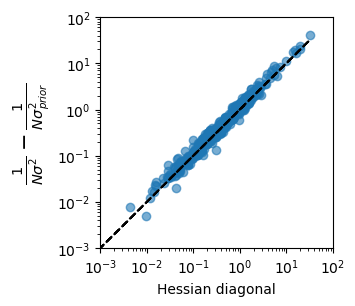

In [4]:
# Define the path for loading data
path = '../results_clean/APPROX/MESU/'

l=1e6
# Initialize the figure
fig, ax = plt.subplots(figsize=(3, 3))

# Load the data
hessian = 32 * np.loadtxt(path + 'hessian' + str(int(l)) + str(1)) / 6000
print(hessian.mean())
sigma = np.loadtxt(path + 'sigma' + str(int(l)) + str(1))



# Plot data with log-log scale and grid
ax.plot(hessian, hessian, '--', color='black')
ax.scatter(hessian, hess(sigma), color='C0', alpha=0.6)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Customize labels and remove title
ax.set_xlabel('Hessian diagonal')
ax.set_ylabel(r'$\frac{1}{N\sigma^2} - \frac{1}{N\sigma_{prior}^2}$', fontsize=15)
plt.ylim([0.001,100])
plt.xlim([0.001,100])
plt.savefig('scatter_sigma_hess.svg')
plt.show()



0.6398858438746136


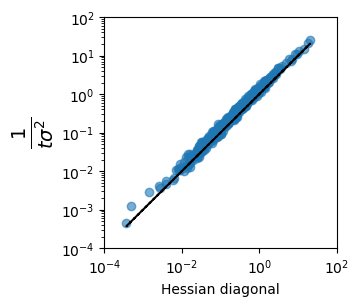

In [5]:
# Define the path for loading data
path = '../results_clean/APPROX/BGD/'

# Initialize the figure
fig, ax = plt.subplots(figsize=(3, 3))

# Load the data
hessian = 32 * np.loadtxt(path + 'hessian' + str(int(l)) + str(0)) / 6000
print(hessian.mean())
sigma = np.loadtxt(path + 'sigma' + str(int(l)) + str(0))



# Plot data with log-log scale and grid
ax.plot(hessian, hessian, '--', color='black')
ax.scatter(hessian, (1/sigma**2)*1e-6, color='C0', alpha=0.6)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Customize labels and remove title
ax.set_xlabel('Hessian diagonal')
ax.set_ylabel(r'$\frac{1}{t\sigma^2}$', fontsize=20)
plt.ylim([0.0001,100])
plt.xlim([0.0001,100])
plt.savefig('scatter_sigma_hess_bgd.svg')
plt.show()


2.081286365702629
1.8198463812689383
1.782307366830826
0.9444927436370651
1.5496549388044674
1.3445970863617263
1.126853195914368
0.6398858438746136


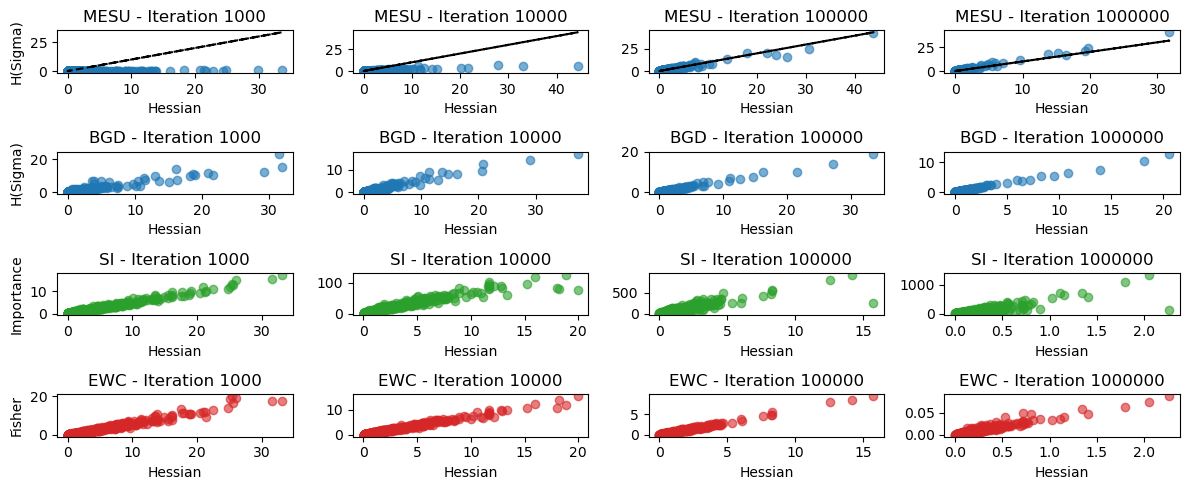

In [6]:

path='../results_clean/APPROX/'
# Create a single figure with a 3x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 5))

# Define colors for each category
colors = {'MESU': 'C0', 'SI': 'C2', 'EWC': 'C3'}
corr_mesu=[]
corr_bgd=[]
corr_si=[]
corr_ewc=[]
# Plot MESU data
for i, l in enumerate(L):
    hessian = 32*np.loadtxt(path + 'MESU/hessian' + str(int(l))+str(1))/6000
    print(hessian.mean())
    sigma = np.loadtxt(path + 'MESU/sigma' + str(int(l))+str(1))
    corr = np.corrcoef(hessian, hess(sigma))[1, 0]
    corr_mesu.append(corr)
    ax = axs[0, i]
    ax.plot(hessian,hessian,'--',color='black')
    ax.scatter(hessian, hess(sigma), color=colors['MESU'], alpha=0.6)
    ax.set_title('MESU - Iteration ' + str(int(l)))
    if i == 0:
        ax.set_ylabel('H(Sigma)')
    ax.set_xlabel('Hessian')
    
# Plot BGD data
for i, l in enumerate(L):
    hessian = 32*np.loadtxt(path + 'BGD/hessian' + str(int(l))+str(0))/6000
    print(hessian.mean())
    sigma = np.loadtxt(path + 'BGD/sigma' + str(int(l))+str(0))
    corr = np.corrcoef(hessian, hess(sigma))[1, 0]
    corr_bgd.append(corr)
    ax = axs[1, i]
    # ax.plot(hessian,hessian,'--',color='black')
    ax.scatter(hessian, (1/sigma**2)/(2*l), color=colors['MESU'], alpha=0.6)
    ax.set_title('BGD - Iteration ' + str(int(l)))
    if i == 0:
        ax.set_ylabel('H(Sigma)')
    ax.set_xlabel('Hessian')
    # ax.set_ylim([0,100])
    
# Plot SI data
for i, l in enumerate(L):
    hessian = 32*np.loadtxt(path + 'SI/hessian' + str(int(l))+str(0))/6000
    importance = np.loadtxt(path + 'SI/importance' + str(int(l))+str(0))
    corr = np.corrcoef(hessian, importance)[1, 0]
    corr_si.append(corr)
    ax = axs[2, i]
    ax.scatter(hessian, importance, color=colors['SI'], alpha=0.6)
    ax.set_title('SI - Iteration ' + str(int(l)))
    if i == 0:
        ax.set_ylabel('Importance')
    ax.set_xlabel('Hessian')

# Plot EWC data
for i, l in enumerate(L):
    hessian = 32*np.loadtxt(path + 'EWC/hessian' + str(int(l))+str(0))/6000
    fisher = np.loadtxt(path + 'EWC/fisher' + str(int(l))+str(0))
    corr = np.corrcoef(hessian, fisher)[1, 0]
    corr_ewc.append(corr)
    ax = axs[3, i]
    ax.scatter(hessian, fisher, color=colors['EWC'], alpha=0.6)
    ax.set_title('EWC - Iteration ' + str(int(l)))
    if i == 0:
        ax.set_ylabel('Fisher')
    ax.set_xlabel('Hessian')

# Adjust layout
plt.tight_layout()
plt.show()

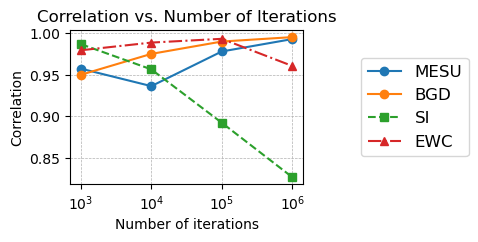

In [7]:
plt.figure(figsize=(3, 2))

plt.plot(corr_mesu, label='MESU', linestyle='-', marker='o')
plt.plot(corr_bgd, label='BGD', linestyle='-', marker='o')

plt.plot(corr_si, label='SI', linestyle='--', marker='s')
plt.plot(corr_ewc, label='EWC', linestyle='-.', marker='^')

# Set x-ticks
plt.xticks([0, 1, 2, 3], labels=[r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'])

# Adding labels, title, legend, and grid
plt.xlabel('Number of iterations')
plt.ylabel('Correlation')
plt.title('Correlation vs. Number of Iterations')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='center right', bbox_to_anchor=(1.75, 0.5))

# Display the plot
plt.show()

1.9853216889673868
1.8457290140035947
1.7160346220823925
0.8643984841496148
1.5496549388044674
1.3445970863617263
1.126853195914368
0.6398858438746136


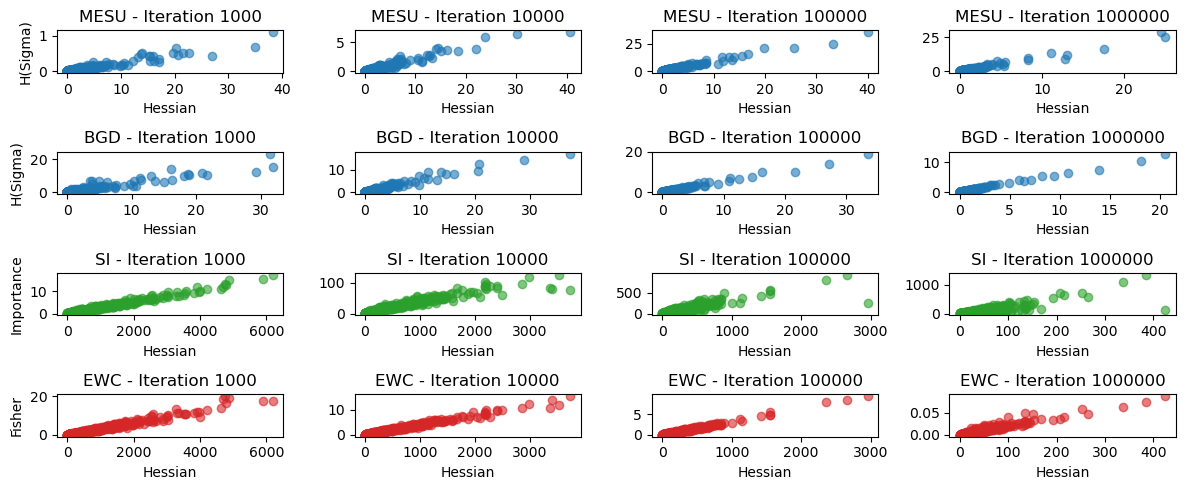

2.081286365702629
1.8198463812689383
1.782307366830826
0.9444927436370651
1.6027155190718172
1.2212441819764772
1.042126782741651
0.6220847486900389


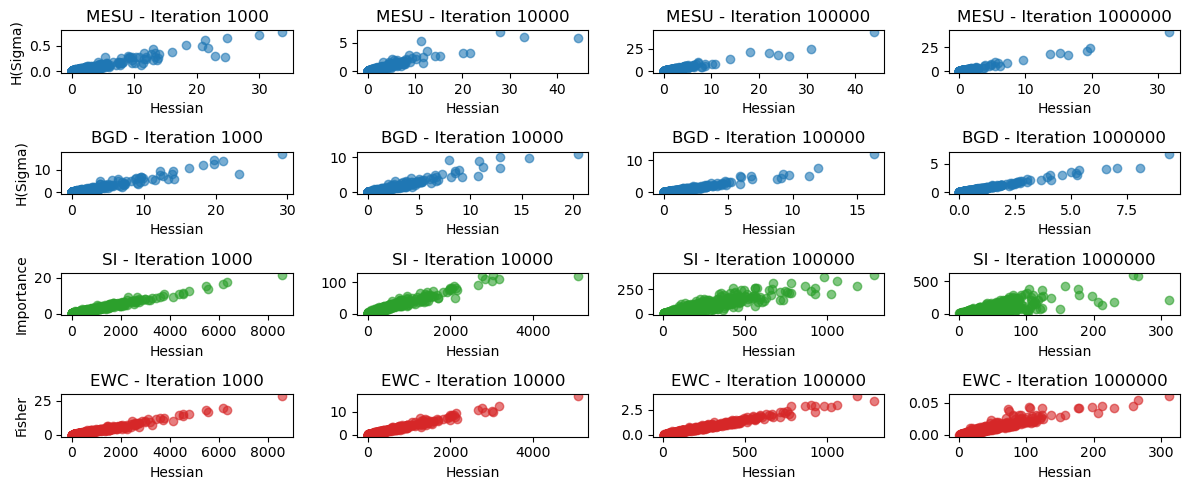

2.09530394930013
1.8120466349306108
1.8470022829154331
0.9039577301906745
1.5786088185094198
1.1662806891707975
0.9205694662558238
0.5405519098780155


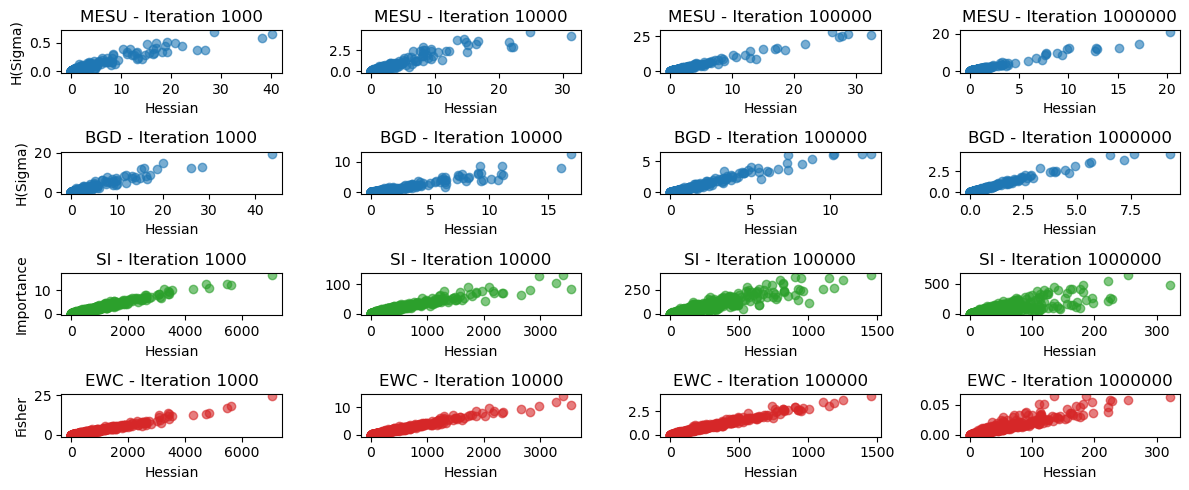

In [8]:
corr_mesu=np.zeros((3,4))
corr_si=np.zeros((3,4))
corr_ewc=np.zeros((3,4))
corr_bgd=np.zeros((3,4))


for j in range(3):
    fig, axs = plt.subplots(4, 4, figsize=(12, 5))

    # Define colors for each category
    colors = {'MESU': 'C0', 'SI': 'C2', 'EWC': 'C3'}
    for i, l in enumerate(L):
        hessian = 32*np.loadtxt(path + 'MESU/hessian' + str(int(l))+str(j))/6000
        print(hessian.mean())
        sigma = np.loadtxt(path + 'MESU/sigma' + str(int(l))+str(j))
        corr = np.corrcoef(hessian, hess(sigma))[1, 0]
        corr_mesu[j,i]=corr
        ax = axs[0, i]
        # ax.plot(hessian,hessian,'--',color='black')
        ax.scatter(hessian, hess(sigma), color=colors['MESU'], alpha=0.6)
        ax.set_title('MESU - Iteration ' + str(int(l)))
        if i == 0:
            ax.set_ylabel('H(Sigma)')
        ax.set_xlabel('Hessian')

    for i, l in enumerate(L):
        hessian = 32*np.loadtxt(path + 'BGD/hessian' + str(int(l))+str(j))/6000
        print(hessian.mean())
        sigma = np.loadtxt(path + 'BGD/sigma' + str(int(l))+str(j))
        corr = np.corrcoef(hessian, hess(sigma))[1, 0]
        corr_bgd[j,i]=corr
        ax = axs[1, i]
        # ax.plot(hessian,hessian,'--',color='black')
        ax.scatter(hessian, (1/sigma**2)/(2*l), color=colors['MESU'], alpha=0.6)
        ax.set_title('BGD - Iteration ' + str(int(l)))
        if i == 0:
            ax.set_ylabel('H(Sigma)')
        ax.set_xlabel('Hessian')
    
    # Plot SI data
    for i, l in enumerate(L):
        hessian = np.loadtxt(path + 'SI/hessian' + str(int(l))+str(j))
        importance = np.loadtxt(path + 'SI/importance' + str(int(l))+str(j))
        corr = np.corrcoef(hessian, importance)[1, 0]
        corr_si[j,i]=corr
        ax = axs[2, i]
        ax.scatter(hessian, importance, color=colors['SI'], alpha=0.6)
        ax.set_title('SI - Iteration ' + str(int(l)))
        if i == 0:
            ax.set_ylabel('Importance')
        ax.set_xlabel('Hessian')
    
    # Plot EWC data
    for i, l in enumerate(L):
        hessian = np.loadtxt(path + 'EWC/hessian' + str(int(l))+str(j))
        fisher = np.loadtxt(path + 'EWC/fisher' + str(int(l))+str(j))
        corr = np.corrcoef(hessian, fisher)[1, 0]
        corr_ewc[j,i]=corr
        ax = axs[3, i]
        ax.scatter(hessian, fisher, color=colors['EWC'], alpha=0.6)
        ax.set_title('EWC - Iteration ' + str(int(l)))
        if i == 0:
            ax.set_ylabel('Fisher')
        ax.set_xlabel('Hessian')
        
    # Adjust layout
    plt.tight_layout()
    plt.show()

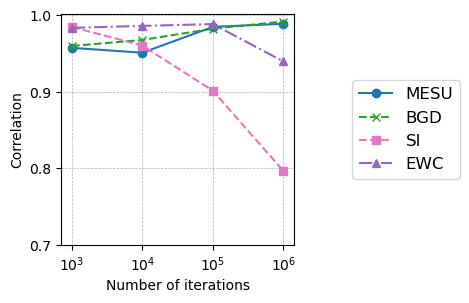

In [9]:
plt.figure(figsize=(3, 3))
plt.plot(np.mean(corr_mesu,axis=0), label='MESU', linestyle='-', marker='o',color='C0')
plt.plot(np.mean(corr_bgd,axis=0), label='BGD', linestyle='--', marker='x',color='C2')
plt.plot(np.mean(corr_si,axis=0), label='SI', linestyle='--', marker='s',color='C6')
plt.plot(np.mean(corr_ewc,axis=0), label='EWC', linestyle='-.', marker='^',color='C4')

# Set x-ticks
plt.xticks([0, 1, 2, 3], labels=[r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'])
plt.yticks([0.7,0.8,0.9, 1])

# Adding labels, title, legend, and grid
plt.xlabel('Number of iterations')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='center right', bbox_to_anchor=(1.75, 0.5))
plt.savefig('corr.svg')
# Display the plot
plt.show()

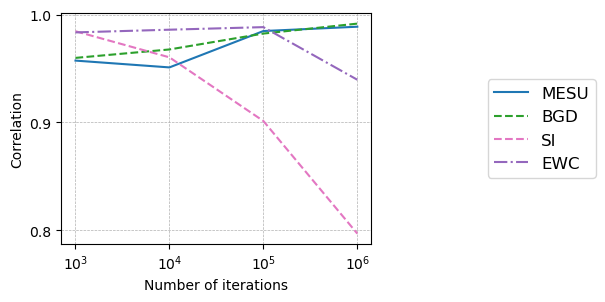

In [10]:
plt.figure(figsize=(4, 3))
plt.plot(np.mean(corr_mesu,axis=0), label='MESU', linestyle='-',color='C0')
plt.plot(np.mean(corr_bgd,axis=0), label='BGD', linestyle='--',color='C2')
plt.plot(np.mean(corr_si,axis=0), label='SI', linestyle='--',color='C6')
plt.plot(np.mean(corr_ewc,axis=0), label='EWC', linestyle='-.',color='C4')

# Set x-ticks
plt.xticks([0, 1, 2, 3], labels=[r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'])
plt.yticks([0.8,0.9, 1])

# Adding labels, title, legend, and grid
plt.xlabel('Number of iterations')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='center right', bbox_to_anchor=(1.75, 0.5))
plt.savefig('corr.svg')
# Display the plot
plt.show()


In [11]:
corr_si

array([[0.98718894, 0.95674595, 0.89247076, 0.82695738],
       [0.98526074, 0.96455514, 0.90164202, 0.77210958],
       [0.9812078 , 0.95976507, 0.90987134, 0.79161963]])

In [12]:
corr_ewc

array([[0.97976951, 0.98902642, 0.99355175, 0.96089689],
       [0.98680955, 0.98514641, 0.98639753, 0.93485534],
       [0.98386316, 0.98377281, 0.98515215, 0.92299639]])